## Dataset com dados da COVID-19
<br>
O Brasil teve seu primeiro caso de coronavirus confirmado no dia 26/02/2020 em São Paulo. Após a descoberta do primeiro caso o país passou por diversas mudanças, como por exemplo 14 dias depois (11/03), alguns estados começaram a tomar medidas como suspender aulas e eventos com um numero elevado de pessoas, o Distrito Federal foi o primeiro a tomar essa medida e nos dias seguintes cidades como Rio de janeiro e são paulo passaram a tomar medidas semelhantes. 21/03 o número de contaminados no país passou de 1000

* Link do dataset: https://covid.saude.gov.br/<br>
* Dados Atualizados dia 25/04/2020

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cv = pd.read_csv('datasets/arquivo_geral.csv',sep=';')

#### Analise inicial e tratamento dos dados

In [3]:
cv.head()

,regiao,estado,data,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
0,Norte,RO,2020-01-30,0,0,0,0
1,Norte,RO,2020-01-31,0,0,0,0
2,Norte,RO,2020-02-01,0,0,0,0
3,Norte,RO,2020-02-02,0,0,0,0
4,Norte,RO,2020-02-03,0,0,0,0


In [4]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 7 columns):
regiao              2349 non-null object
estado              2349 non-null object
data                2349 non-null object
casosNovos          2349 non-null int64
casosAcumulados     2349 non-null int64
obitosNovos         2349 non-null int64
obitosAcumulados    2349 non-null int64
dtypes: int64(4), object(3)
memory usage: 128.5+ KB


In [5]:
cv.describe()

,casosNovos,casosAcumulados,obitosNovos,obitosAcumulados
count,2349.000000,2349.000000,2349.000000,2349.000000
mean,24.908046,302.781183,1.709664,17.817369
std,101.851953,1276.093533,8.967431,94.824389
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,11.000000,101.000000,0.000000,3.000000
max,2178.000000,20004.000000,211.000000,1667.000000


In [231]:
#criar um dataframe sem todas aquelas informações de data repetidas

#Seleciona a data mostrando apenas UMA vez cada data
lista_data = cv['data'].unique()

#Criando listas para armazenar os dados na mesma quantidade da lista com as datas
lista_casosAcumulados = []
lista_obitosAcumulados = []
lista_casosNovos = []
lista_obitosNovos = []

#Criado um laço que para cada iteração do dia ele grave nas listas a soma dos valores
#daquele dia em todos os estados
for dia in range(len(lista_data)):
    lista_casosAcumulados.append(cv[cv['data'] == lista_data[dia]]['casosAcumulados'].sum())
    lista_casosNovos.append(cv[cv['data'] == lista_data[dia]]['casosNovos'].sum())
    lista_obitosAcumulados.append(cv[cv['data'] == lista_data[dia]]['obitosAcumulados'].sum())
    lista_obitosNovos.append(cv[cv['data'] == lista_data[dia]]['obitosNovos'].sum())

#Transfomo as listas em Series
data = pd.Series(lista_data)
casosAcumulados = pd.Series(lista_casosAcumulados)
obitosAcumulados = pd.Series(lista_obitosAcumulados)
casosNovos = pd.Series(lista_casosNovos)
obitosNovos = pd.Series(lista_obitosNovos)

#Crio um DataFrame a partir da data
df_por_data = data.to_frame(name='data')

#Cria as colunas com os dados no Dataframe
df_por_data['casosAcumulados'] = casosAcumulados
df_por_data['obitosAcumulados'] = obitosAcumulados
df_por_data['casosNovos'] = casosNovos
df_por_data['obitosNovos'] = obitosNovos

df_por_data.head()

,data,casosAcumulados,obitosAcumulados,casosNovos,obitosNovos
0,2020-01-30,0,0,0,0
1,2020-01-31,0,0,0,0
2,2020-02-01,0,0,0,0
3,2020-02-02,0,0,0,0
4,2020-02-03,0,0,0,0


# Análise dos dados da doença no Brasil

## Estados com mais casos 

In [168]:
#Pega sempre a informação do ultimo dia do dataset
ultimo_dia = cv[['casosAcumulados','data']].max()[1]

#Filtra os casos acumulados por estado com a maior quantiddade de casos
maior_n_casos = cv[cv['data'] == ultimo_dia][['estado','casosAcumulados']].sort_values(by='casosAcumulados',ascending=False)
#Corrige o indice
maior_n_casos.reset_index(inplace=True,drop=True)
#Renomeia as colunas
maior_n_casos.columns = [['Estado','Casos Acumulados']]
#imprime os 5 primeiros
maior_n_casos.head()

,Estado,Casos Acumulados
0,SP,20004
1,RJ,6828
2,CE,5421
3,PE,4507
4,AM,3635


A seleção acima mostra os 5 estados que possuem o maior numero de casos. Desde o começo da pademia São Paulo está com o maior número de casos

In [230]:
print('Atualmente o Brasil possui no total',df_por_data['casosNovos'].sum(),'Casos de COVID-19 e',df_por_data['obitosNovos'].sum(),'obitos,',
     'a doença tem uma letalidade de {x}%'.format(x=round(df_por_data['obitosNovos'].sum()/df_por_data['casosNovos'].sum() * 100,2)))

Atualmente o Brasil possui no total 58509 Casos de COVID-19 e 4016 obitos, a doença tem uma letalidade de 6.86%


## Evolução da doença por dia no Brasil

In [7]:
#Setando um grid
sns.set_style("darkgrid")

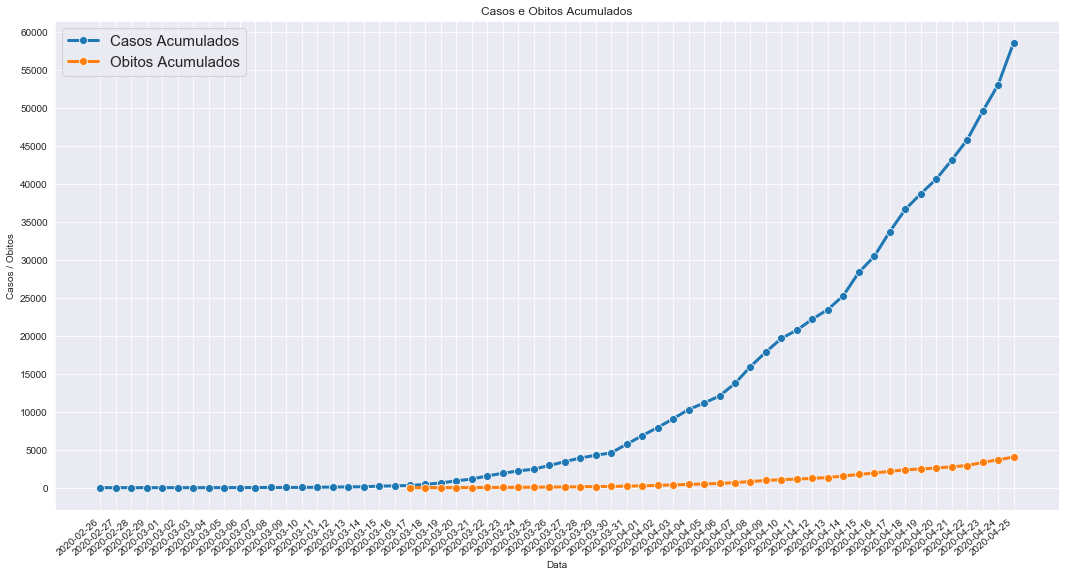

In [171]:
#IMPRESSÃO DO GRAFICO (Casos e Obitos Acumulados x Data)

plt.figure(figsize=(18,9))
sns.lineplot(x='data',y=df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'],data=df_por_data,lw=3,marker='o',
             markersize=8,label='Casos Acumulados')
sns.lineplot(x='data',y=df_por_data[df_por_data['obitosAcumulados'] > 0]['obitosAcumulados'],data=df_por_data,lw=3,marker='o',
             markersize=8,label='Obitos Acumulados')

#Aumenta a legenda
plt.yticks(np.arange(0,df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'].max() + 5001,5000))
#Inclina a escala
plt.xticks(rotation=40, horizontalalignment='right')
plt.title('Casos e Obitos Acumulados')
plt.ylabel('Casos / Obitos')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15

plt.legend()
plt.show()

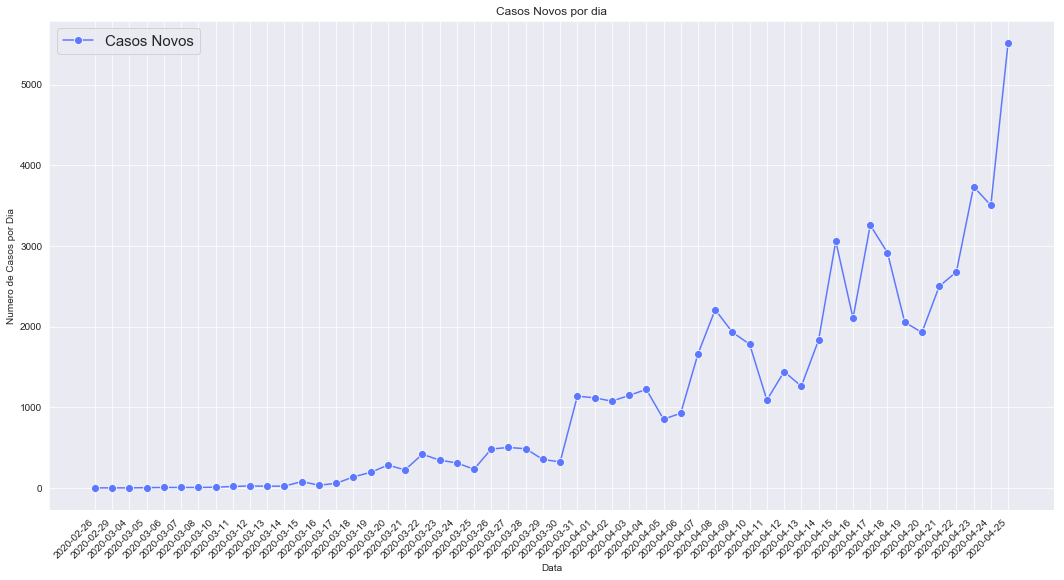

In [32]:
#TESTE DE IMPRESSÃO DO GRAFICO (Casos Novos por dia)

plt.figure(figsize=(18,9))
sns.lineplot(x='data',y=df_por_data[df_por_data['casosNovos'] > 0]['casosNovos'],data=df_por_data,marker='o',
             markersize=8,color='#5D78FF',label='Casos Novos')

#Inclina a escala
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Casos Novos por dia')
plt.ylabel('Numero de Casos por Dia')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15
plt.legend()

plt.show()

              Casos Confirmados
regiao                         
Sudeste                   29908
Nordeste                  16293
Norte                      6880
Sul                        3445
Centro-Oeste               1983


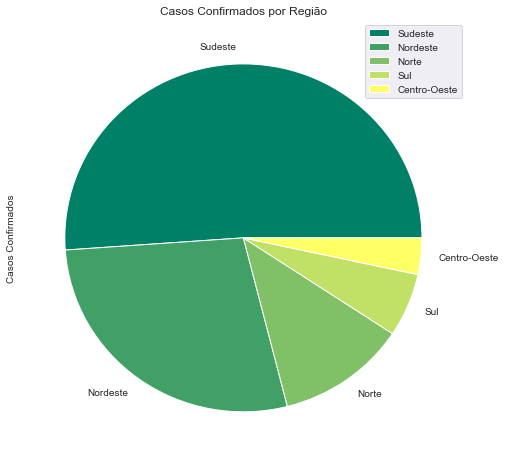

In [24]:
#Fazer grafico de casos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
total_casos_por_regiao.columns = ['Casos Confirmados']

print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10
total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),cmap='summer')
#colors=['#FF4500','#FF8C00','#FFA500','#FFD700','#FFFF00']
plt.title('Casos Confirmados por Região')

plt.show()

              Obitos Confirmados
regiao                          
Sudeste                     2387
Nordeste                    1002
Norte                        415
Sul                          145
Centro-Oeste                  67


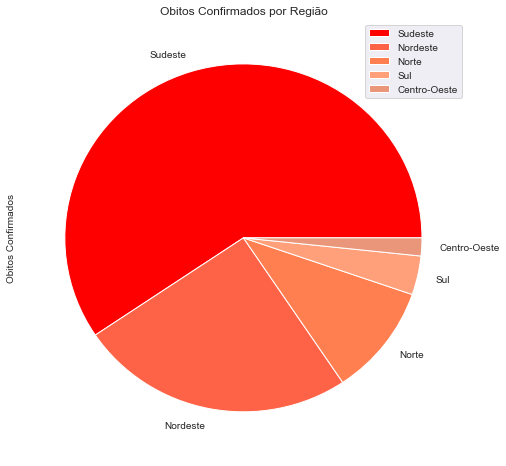

In [26]:
#Fazer grafico de Obitos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','obitosNovos']].sum().sort_values(by='obitosNovos',ascending=False)
total_casos_por_regiao.columns = ['Obitos Confirmados']

print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10

total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),colors=['#FF0000','#FF6347','#FF7F50','#FFA07A','#E9967A'])
plt.title('Obitos Confirmados por Região')

plt.show()

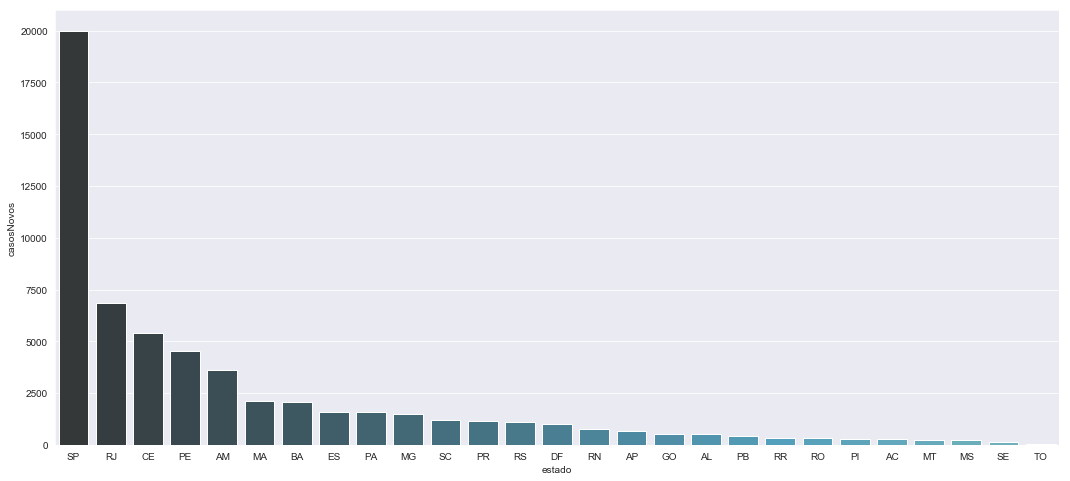

In [12]:
#Agrupa os estados e os casos, soma e ordena pela quantidade de casos
total_casos_por_estado = cv.groupby('estado')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
#Remove o estado que ficou como index
total_casos_por_estado = total_casos_por_estado.reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x='estado',y='casosNovos',data=total_casos_por_estado,
            palette=sns.color_palette("GnBu_d",n_colors=len(total_casos_por_estado)+12 ))

plt.show()

In [13]:
#Casos por semana

In [14]:
#Pensar em mais informações

# ------------------------------------------------------------------------------------<br>
### PERIGO ZONA DE TESTES<br>
# ------------------------------------------------------------------------------------

In [236]:
df_por_data[df_por_data['data'] == '2020-03-21']

,data,casosAcumulados,obitosAcumulados,casosNovos,obitosNovos
51,2020-03-21,1128,18,224,7
